Adam Wilczyński 156 065 | Kuba Czech 156 035
group 3

# Report 3 - Basic Graph Algorithms

## Graphs

### Definition

Graph is a data structure used for representing relations between nodes (vertices) using edges (arcs).

### Directed and Undirected Graphs

In directed graphs the edges have the following meaning:

u <-> v
both-way relation

u -> v
u is precedent of v, v is ascendant of u

### Cyclic and Acyclic Graphs

cyclic graph - graph containing a cycle

cycle - closed path
path - walk without repeating vertices
walk - traversing graph vertices using edges

#### Topological Sorting on DAG (Directed Acyclic Graphs)

Type of linear ordering of Directed Acyclic Graph’s vertices such that for every directed edge if u precedes v, then u comes before v.

Topological sorting is useful for determining order of tasks dependent on each other.

Example practical applications:
- dependency resolution
- task scheduling
- data processing
- compiler design
- network routing

### Types of cycles:

#### Euler cycle

Type of cycle where it is possible to choose such a route that we can traverse every arc only once and finish in a starting vertex (but we can visit each node more than once)

#### Hamiltonian cycle

Cycle where it is possible to choose such a route that we can visit every vertex once and finish in a starting vertex (but we can traverse through each arc more than once)

## Program Specifications

### Random Directed Acyclic Graph

Time Complexity: O(n)

### Topological Sort with DFS on Adjacency List

Time Complexity: O(n^2)

### Topological Sort with DFS on Adjacency Matrix

Time Complexity: O(n^2)

### Topological Sort with naive implementation

Time Complexity: O(n^2)

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from dag_report import DAG

## Showcase

In [2]:
test_dag = DAG(6, 5)

print("REPRESENTATION")

print(f"Edge List Representation:\n{test_dag.edge_list_representation}\n")
print(f"Adjacency List Representation:\n{test_dag.adjacency_list_representation}\n")
print(f"Adjacency Matrix Representation:\n{test_dag.adjacency_matrix_representation}\n")

print("TOPOLOGICAL SORTING")

print(f"Adjacency List:\n{test_dag.topological_sort_with_dfs_on_adjacency_list()}\n")
print(f"Adjacency Matrix:\n{test_dag.topological_sort_with_dfs_on_adjacency_matrix()}\n")
print(f"Naive:\n{test_dag.topological_sort_naive_on_edge_list()}\n")

REPRESENTATION
Edge List Representation:
[Edge(v1=3, v2=4), Edge(v1=1, v2=5), Edge(v1=1, v2=3), Edge(v1=1, v2=4), Edge(v1=0, v2=5)]

Adjacency List Representation:
{0: [5], 1: [5, 3, 4], 2: [], 3: [4], 4: [], 5: []}

Adjacency Matrix Representation:
[[False False False False False  True]
 [False False False  True  True  True]
 [False False False False False False]
 [False False False False  True False]
 [False False False False False False]
 [False False False False False False]]

TOPOLOGICAL SORTING
Adjacency List:
[2, 1, 3, 4, 0, 5]

Adjacency Matrix:
[2, 1, 3, 4, 0, 5]

Naive:
[0, 1, 2, 3, 5, 4]



In [3]:
import timeit

EXPERIMENT_NUMBER = 5

adjacency_list = []
adjacency_matrix = []
naive_list = []

vertex_range = [8, 16, 32, 64, 128, 256]

for vertex_count in vertex_range:
    maximum_edge_count = vertex_count * (vertex_count - 1)
    dag = DAG(vertex_count, maximum_edge_count)

    adjacency_list.append(
        timeit.timeit(
            stmt=lambda: dag.topological_sort_with_dfs_on_adjacency_list(),
            number=EXPERIMENT_NUMBER
        )
    )

    adjacency_matrix.append(
        timeit.timeit(
            stmt=lambda: dag.topological_sort_with_dfs_on_adjacency_matrix(),
            number=EXPERIMENT_NUMBER
        )
    )

    naive_list.append(
        timeit.timeit(
            stmt=lambda: dag.topological_sort_naive_on_edge_list(),
            number=EXPERIMENT_NUMBER
        )
    )

[adjacency_list, adjacency_matrix, naive_list]

[[9.240000508725643e-05,
  0.00041930004954338074,
  0.0009588999673724174,
  0.003880100091919303,
  0.017583500128239393,
  0.1327411001548171],
 [0.00028830021619796753,
  0.0004900998901575804,
  0.001619500108063221,
  0.005679600173607469,
  0.020947299897670746,
  0.15395099995657802],
 [0.0002911998890340328,
  0.0013996001798659563,
  0.011513300007209182,
  0.09697750001214445,
  1.0274568998720497,
  7.906625099945813]]

In [4]:
data = {
    "nodes_number": vertex_range,
    # "edge_number": [vertex_count * (vertex_count - 1) for vertex_count in vertex_range],
    "adjacency_list": adjacency_list,
    "adjacency_matrix": adjacency_matrix,
    "naive_list": naive_list,
}
df = pd.DataFrame(data).melt("nodes_number", var_name="method", value_name="seconds")
df

,nodes_number,method,seconds
0,8,adjacency_list,0.000092
1,16,adjacency_list,0.000419
2,32,adjacency_list,0.000959
3,64,adjacency_list,0.003880
4,128,adjacency_list,0.017584
5,256,adjacency_list,0.132741
6,8,adjacency_matrix,0.000288
7,16,adjacency_matrix,0.000490
8,32,adjacency_matrix,0.001620
9,64,adjacency_matrix,0.005680


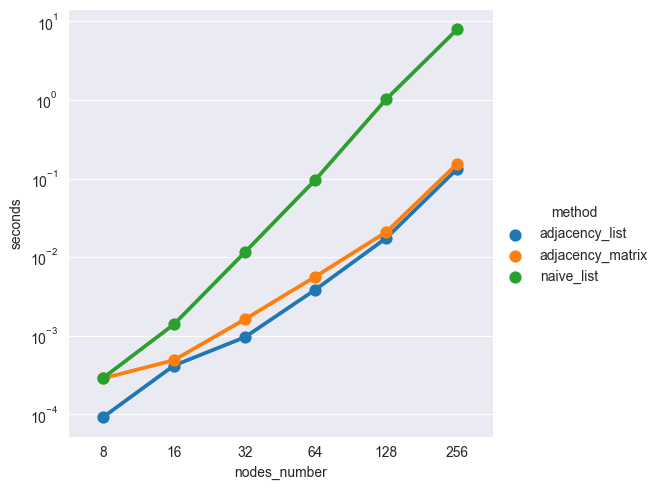

In [13]:
sns.catplot(df, x="nodes_number", y="seconds", hue="method", kind="point")
plt.yscale("log")